In [1]:
import h5py
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_mldata
from sknn.mlp import Classifier, Layer

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def load_h5py(filename):
    with h5py.File(filename, 'r') as hf:
        X = hf['X'][:]
        Y = hf['Y'][:]
    return X, Y

In [3]:
mnist = fetch_mldata('MNIST original')

x=mnist.data
y=mnist.target

x_arr=[]

for xi in x:
    x_arr.append(np.reshape(xi,xi.size))

x=x_arr

#number_of_samples=len(y)
#num_train=int(number_of_samples*0.7)
#num_test=int(number_of_samples*0.30)
#random_indices = np.random.permutation(number_of_samples)
#x_train = x[random_indices[:num_train]]
#x_test = x[random_indices[num_train]]


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=7)

In [4]:
scaler = StandardScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [6]:
#model=MLPClassifier(activation='logistic',solver='sgd',hidden_layer_sizes=(100,50),random_state=1) 

model = Classifier(
    layers=[
        Layer("Sigmoid", units=100),
        Layer("Sigmoid",units=50),
        Layer("Softmax")],
    learning_rate=0.001,
    verbose=100,
    n_iter=25)

In [7]:
model.fit(x_train,y_train)

Initializing neural network with 3 layers, 784 inputs and 10 outputs.
  - Dense: Sigmoid    Units:  100 
  - Dense: Sigmoid    Units:  50  
  - Dense: Softmax    Units:  10  

Training on dataset of 52,500 samples with 41,685,000 total size.
  - Terminating loop after 25 total iterations.
  - Early termination after 10 stable iterations.

Epoch       Training Error       Validation Error       Time
------------------------------------------------------------
    1          1.174e+00                 N/A           15.4s
    2          4.192e-01                 N/A           14.8s
    3          3.167e-01                 N/A           14.7s
    4          2.726e-01                 N/A           15.0s
    5          2.444e-01                 N/A           14.9s
    6          2.231e-01                 N/A           14.7s
    7          2.060e-01                 N/A           14.8s
    8          1.917e-01                 N/A           14.7s
    9          1.791e-01                 N/A     

Classifier(batch_size=1, callback=None, debug=False, dropout_rate=None,
      f_stable=0.001,
      hidden0=<sknn.nn.Layer `Sigmoid`: name='hidden0', units=100, frozen=False>,
      hidden1=<sknn.nn.Layer `Sigmoid`: name='hidden1', units=50, frozen=False>,
      layers=[<sknn.nn.Layer `Sigmoid`: name='hidden0', units=100, frozen=False>, <sknn.nn.Layer `Sigmoid`: name='hidden1', units=50, frozen=False>, <sknn.nn.Layer `Softmax`: name='output', units=10, frozen=False>],
      learning_momentum=0.9, learning_rate=0.001, learning_rule='sgd',
      loss_type=None, n_iter=25, n_stable=10, normalize=None,
      output=<sknn.nn.Layer `Softmax`: name='output', units=10, frozen=False>,
      parameters=None, random_state=None, regularize=None, valid_set=None,
      valid_size=0.0, verbose=100, warning=None, weight_decay=None)

In [8]:
predicted=model.predict(x_test)

print(accuracy_score(y_test, predicted)*100)

[(17500, 10)]
96.0285714286


In [9]:
from sklearn.externals import joblib
joblib.dump(model, 'q2_2.pkl') 

['q2_2.pkl']

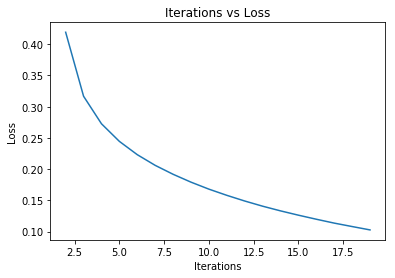

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

iteration=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
lossval=[4.192e-01 ,3.167e-01,2.726e-01,2.444e-01,2.231e-01,2.060e-01,1.917e-01,1.791e-01,1.679e-01,1.580e-01,1.489e-01,1.406e-01,1.331e-01,1.262e-01,1.197e-01,1.135e-01,1.080e-01,1.026e-01]

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Iterations vs Loss')
plt.plot(iteration,lossval)